## DS4400 Coding Exam

This is the coding exam for DS4400. You have 100 minutes in the lecture. Please write down all the codes and in the Code chuck and written answers in the markdown chuck. Add any chuck if you need. Submit the exam as the homework, with both python and pdf file. The exam is open-book, open notes. Please raise your hand if you have any questions. 

#### Question 1: Data analysis
In the following question, you will need to analysis a simulated data. Please answer each question below the instructions. 

In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)

1. Split the data into training and test data. The proportion of train data should be 70%. 

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.3, random_state=4400)

2. Fit the model with a linear regression using all the features, report the coefficient table, intercept and MSE. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import DataFrame

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE)", mse)

# coefficients and intercept
coef_df = DataFrame(X.columns)
coef_df.columns = ['Feature']
coef_df["Coefficient Estimate"] = pd.Series(model.coef_)
print(coef_df)
print("the intercerpt is %.3f" %model.intercept_)

Mean Squared Error (MSE) 0.28330490934997343
   Feature  Coefficient Estimate
0     Var1              2.014028
1     Var2             -0.069955
2     Var3             -0.118858
3     Var4              0.014757
4     Var5              0.425563
5     Var6              0.022228
6     Var7              0.050038
7     Var8              0.097579
8     Var9             -0.073342
9    Var10             -1.096217
10   Var11              0.007303
11   Var12              0.078436
12   Var13              0.025088
13   Var14             -0.014747
14   Var15             -0.051823
15   Var16             -0.034156
16   Var17             -0.081478
17   Var18              0.126210
18   Var19              0.086301
19   Var20              0.119386
the intercerpt is -0.023


3. Fit the model with a polynomial regression with degree 2, report the MSE. Is it necessary to use polynomial regression in this case?

In [7]:
from sklearn.preprocessing import PolynomialFeatures


degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)

# Create + fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_poly_test = poly_features.fit_transform(X_test)
y_poly_test = poly_model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_poly_test)

print("Mean Squared Error (MSE)", mse)

# No, it is not necessary to use polynomial regression as linear regression has a lower MSE compared to
# polynomial regression (0.2833 vs. 0.3913), indicating that linear regression better fits the data.

Mean Squared Error (MSE) 0.39129598085883716


4. Fit the model with a Lasso regression, tune the parameter for the penalty parameter $\alpha$. Report the best $\alpha$, MSE and which variables are left in the model in the end. 

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Fit Lasso
alpha = best_alpha  
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lasso_model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Find selected features (which variables have non-0 coefficients)
coef_df = DataFrame(X.columns)
coef_df.columns = ['Feature']
coef_df["Coefficient Estimate"] = pd.Series(lasso_model.coef_)
coef_df.drop(coef_df.loc[coef_df['Coefficient Estimate']==0.000000].index, inplace=True)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Best alpha", best_alpha)
print("\nVariables left in model:\n", coef_df)

Mean Squared Error (MSE): 0.27893476514858456
Best alpha 0.01

Variables left in model:
    Feature  Coefficient Estimate
0     Var1              0.566406
1     Var2             -0.012671
2     Var3             -0.024085
4     Var5              0.111930
6     Var7              0.008001
7     Var8              0.017024
8     Var9             -0.013400
9    Var10             -0.306822
11   Var12              0.012300
14   Var15             -0.006134
15   Var16             -0.002697
16   Var17             -0.016334
17   Var18              0.025483
18   Var19              0.013672
19   Var20              0.024080


5. Define a new target variable $y_1$ such that $y_1$ only contains all the positive values in the $y$. Process $X$ as well. Fit the model with appropriate GLM model (not Gaussian). Report the MSE and can we compare the MSE with previous questions? Hint: it is a continous distribution. 

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)


negative_index = y.index[y < 0]
X = X.drop(negative_index)
y = y.drop(negative_index)


# fit a gamma model because data is continuous and non negative
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 4400)

gamma_model = sm.GLM(y_train, X_train, family = 
                     sm.families.Gamma(link = sm.families.links.Log()))
gamma_results = gamma_model.fit()
y_pred_gamma = gamma_results.predict(X_test)
mse_gamma = mean_squared_error(y_test, y_pred_gamma)

print("MSE for gamma distribution: ", mse_gamma)

# The MSE for the gamma distribution is very similar to the MSE for linear regression and lasso 
# (0.2624 vs. 0.2833 vs. 0.2789) and still significantly smaller than the MSE for polynomial 
# distribution, which was 0.3912, showing Gama model is a good fit for the positive data.

MSE for gamma distribution:  0.26236130418363884


6. Define a new target variable $y_2$ such that $y_2$ is a binary categorical variable. If $y$ is larger than 1, then $y_2$ is "group1", otherwise it is "group2". Fit the $y_2$ and $X$ with a logistic regression. Print the summary table with .summary(), and interpret the coefficient for variable 1.  

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)

# create y2
above_1_index = y.index[y > 1]
below_1_index = y.index[y <= 1]

y2 = (y > 1).astype(int)


# fit logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.3, 
                                                    random_state = 4400)

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()
y_pred = results.predict(X_test)

print("Summary Table:\n", results.summary())

# The coefficient for Var1 is 7.2567. This means with a one unit increase in Var1, there is a 7.2567 unit
# increase in the target value. Since the coefficeint of Var1 is positive, that means there is a positive
# relationship between Var1 and the target variable.

Summary Table:
                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -258.10
Date:                Mon, 16 Oct 2023   Deviance:                       516.20
Time:                        13:20:27   Pearson chi2:                     556.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4461
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Var1           7.2567      0.567    

#### Question 2: Implement Gradient descend for Polynomial Regression

Implement gradient descend method for the polynomial regression. Requirement: 
1. Write the method as a function, which is given here. Notice that it takes an input "degree" (and any other necessary inputs) so that we can change the degree of the polynomial. 
2. Output the cost history as well as the coefficient estimates. No need to print it or make the figures. As long as it is one of the output. 
3. Verify your function with the data in Question 1 (You may need to copy/paste and run the answer in Question 1-1 before you run the verification). No need to compare your coefficients to the ones in question 1. This step is only to make sure your functions work. You can set the degree as 2 in the verification. 

Hint: 
1. Don't overthinking the question. What is the difference between linear regression and polynomial regression?
2. You may need two functions here. One for pre-processing the data, while the other one for gradient desent. You can add more if you need. Like to add another one for the cost function. 
3. When initializing the theta, think about how many coefficients you may need?

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


def poly_function(degree, X):
    
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    return X_poly
    
def gradient_descent(X, y, num_iterations, learning_rate, degree, theta):
    # gradient descent
    n = len(y)
    cost_history = []
    
    for iteration in range(num_iterations):
        predictions = np.dot(X, theta)
        error = y - predictions
        gradient = (-2/n) * np.dot(X.T, error)
        theta = theta + learning_rate * gradient
        cost = np.mean(np.square(error))  
        cost_history.append(cost)
        
    return theta, cost_history


#Verification

X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.3, random_state=4400)

learning_rate = 0.01
num_iterations = 1000
degree = 2

X_poly = poly_function(degree, X_train)

# Initialize model parameters (coefficients)
theta = np.random.randn(X_poly.shape[1], 1)

g = gradient_descent(X_poly, y_train, num_iterations, learning_rate, degree, theta)
print(g)

ValueError: Data must be 1-dimensional, got ndarray of shape (700, 700) instead

#### Question 3: Simulation study

Following is a simulation study. In the second code chuck, please correctly label the xlabel and ylabel for the plot. Also explain what this code is trying to do and what you have learned from the generated figure. 

Hint: in the simulation data, there are 200 observations and it is fixed for each trial. After spliting the training and testing data, each one will have 100 observations. 

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(83)
A = np.arange(5,101,1)
B = []

# for every element p in A
for p in A:

    # create DataFrame X
    X = pd.DataFrame()

    # for i from 1 to p
    for i in np.arange(1, p+1):

        # create a new variable i
        variable_name = f"Var{i}"

        # For variable i in X, create a random array of 200 numbers, with each number ranging from 0 to 1
        X[variable_name] = np.random.rand(200)

    # y is defined as 2 * 
    # the random array of numbers for Var1 stored in X - 
    # 0.5 * the random array of numbers for Var5 stored in X +
    # a random array of 200 numbers with mean 0 and standard distribution 0.5
    y = 2 * X["Var1"] - 0.5 * X["Var5"] + np.random.normal(0, 0.5, 200)

    
    # train test split X and y with test size = 50% of data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.5, 
                                                        random_state=83)
    # create linear regression model
    lm = LinearRegression()

    # fit linear regression model
    lm.fit(X_train, y_train)

    # predict y values
    y_pred = lm.predict(X_test)

    # find MSE
    value = mean_squared_error(y_test, y_pred)

    # append MSE to B
    B.append(value)

# see comments in function for detailed analysis of code chunk
# Summary: for every number p in A (from 5 to 100), create dataframe X with 200 rows and p columns.
    # so, for every iteration of outer for loop (every increase of p), the number of columns in X
    # will increase.
# create y by multiplying X[0] by 2, then subtracting 0.5 * x[4], and finally adding
# a random array of 200 numbers - size of y stays the same for all values of p
# Train test split the X, y data and create a linear regression model
# fit the model with X_train, y_train, then predict y values
# calculate MSE and append MSE to array B
# plot A vs. B
# analysis of graph: as number of columns in X increases (as p gets larger), MSE of 
# linear regression model increases

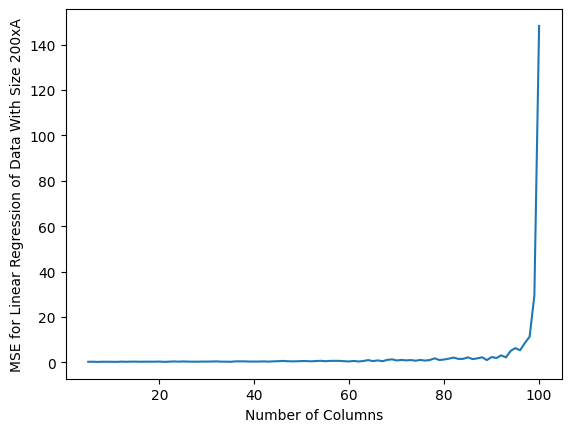

In [58]:
plt.plot(A, B)
plt.xlabel("Number of Columns")
plt.ylabel("MSE for Linear Regression of Data With Size 200xA")
plt.show()